In [1]:
# File management
import sys, os
import subprocess
import pickle

# Data processing
import numpy as np
import pandas as pd
from astropy.io import fits

# Visualization
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.colors import LogNorm
from itertools import repeat

In [2]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(8,4)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

In [3]:
cosmos_dir = "COSMOS2020.R1_v2.1"
cosmos_path = os.path.realpath(os.path.abspath(cosmos_dir))
print(cosmos_path)

/home/joseph/PhotoZ_PhD/lephare_cosmos/COSMOS2020.R1_v2.1


In [4]:
catalogue_type = "CLASSIC"
cosmos_file = os.path.realpath(os.path.join(cosmos_path, f'COSMOS2020_{catalogue_type}_R1_v2.1_p3.fits'))
print(cosmos_file)

/home/joseph/PhotoZ_PhD/lephare_cosmos/COSMOS2020.R1_v2.1/COSMOS2020_CLASSIC_R1_v2.1_p3.fits


In [5]:
cosmos_cat = fits.open(cosmos_file)
cosmos_cat.info()

Filename: /home/joseph/PhotoZ_PhD/lephare_cosmos/COSMOS2020.R1_v2.1/COSMOS2020_CLASSIC_R1_v2.1_p3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      74   ()      
  1  PHASE3CATALOG    1 BinTableHDU   3892   1720700R x 754C   [K, D, D, D, D, D, D, D, E, E, I, I, I, I, I, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, 

In [6]:
cosmos_cat[0].header[0]

True

In [7]:
cosmos_cat[0].header.comments[0]

'conforms to FITS standard'

In [8]:
cosmos_cat[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
PRODCATG= 'SCIENCE.CATALOG'    / Data product category                          
ORIGIN  = 'ESO-PARANAL'        / European Southern Observatory                  
OBSTECH = 'IMAGE,JITTER'       / Technique of observation                       
DATE    = '2022-05-03T11:07:07.000'                                             
MJD-OBS =       55170.29717761 / Start of observations (days)                   
MJD-END =       57568.99498469 / End of observations (days)                     
OBJECT  = 'COSMOS  '           / Target designation                             
RA      =    150.0607352141088 / Image centre (J2000.0)                         
DEC     =    2.2929511096726

In [9]:
cosmos_cat[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3491 / length of dimension 1                          
NAXIS2  =              1720700 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  754 / number of table fields                         
EXTNAME = 'PHASE3CATALOG'                                                       
TTYPE1  = 'ID      '                                                            
TCOMM1  = 'ID (specifically ID_CLASSIC, as this is the Classic catalogue)'      
TUCD1   = 'meta.id;meta.main'                                                   
TFORM1  = 'K       '        

In [10]:
data = cosmos_cat[1].data
cols = cosmos_cat[1].columns
cosmos_cat.close()

(0.0, 3.0)

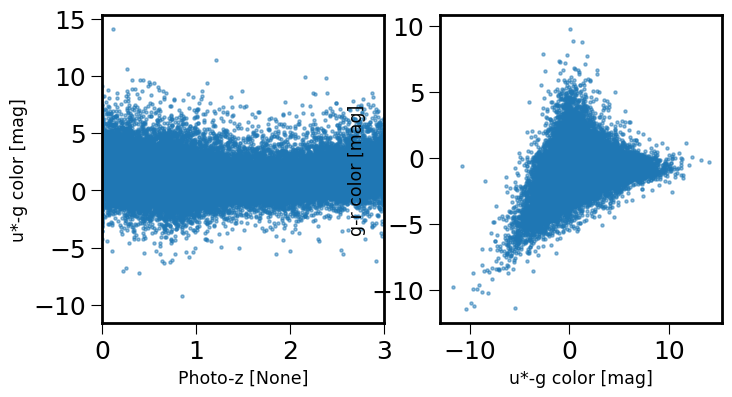

In [11]:
f,a = plt.subplots(1,2)
a = a.ravel()
a[0].scatter(data['lp_zBEST'], data['CFHT_ustar_MAG_APER3']-data['HSC_g_MAG_APER3'], s=5, alpha=0.5)
a[1].scatter(data['CFHT_ustar_MAG_APER3']-data['HSC_g_MAG_APER3'], data['HSC_r_MAG_APER3']-data['HSC_g_MAG_APER3'], s=5, alpha=0.5)
a[0].set_xlabel(f'Photo-z [{cols["lp_zBEST"].unit}]')
a[0].set_ylabel(f'u*-g color [{cols["CFHT_ustar_MAG_APER3"].unit}]')
a[1].set_xlabel(f'u*-g color [{cols["CFHT_ustar_MAG_APER3"].unit}]')
a[1].set_ylabel(f'g-r color [{cols["HSC_g_MAG_APER3"].unit}]')
a[0].set_xlim(0,3)

In [12]:
cols

ColDefs(
    name = 'ID'; format = 'K'
    name = 'ALPHA_J2000'; format = 'D'; unit = 'deg'
    name = 'DELTA_J2000'; format = 'D'; unit = 'deg'
    name = 'X_IMAGE'; format = 'D'; unit = 'pix'
    name = 'Y_IMAGE'; format = 'D'; unit = 'pix'
    name = 'ERRX2_IMAGE'; format = 'D'; unit = 'pix**2'
    name = 'ERRY2_IMAGE'; format = 'D'; unit = 'pix**2'
    name = 'ERRXY_IMAGE'; format = 'D'; unit = 'pix**2'
    name = 'FLUX_RADIUS'; format = 'E'; unit = 'pix'
    name = 'KRON_RADIUS'; format = 'E'
    name = 'FLAG_HSC'; format = 'I'
    name = 'FLAG_SUPCAM'; format = 'I'
    name = 'FLAG_UVISTA'; format = 'I'
    name = 'FLAG_UDEEP'; format = 'I'
    name = 'FLAG_COMBINED'; format = 'I'
    name = 'EBV_MW'; format = 'D'
    name = 'CFHT_u_FLUX_APER2'; format = 'E'; unit = 'uJy'
    name = 'CFHT_u_FLUXERR_APER2'; format = 'E'; unit = 'uJy'
    name = 'CFHT_u_FLUX_APER3'; format = 'E'; unit = 'uJy'
    name = 'CFHT_u_FLUXERR_APER3'; format = 'E'; unit = 'uJy'
    name = 'CFHT_u_FLUX_AUTO

(array([2.9764e+04, 2.1780e+04, 2.8375e+04, 3.3631e+04, 2.5447e+04,
        2.4608e+04, 3.2029e+04, 3.7877e+04, 3.3942e+04, 3.4755e+04,
        2.8367e+04, 2.8772e+04, 2.6427e+04, 1.8785e+04, 2.0126e+04,
        1.7852e+04, 1.6427e+04, 1.9383e+04, 2.0977e+04, 2.0477e+04,
        1.5486e+04, 1.2660e+04, 1.1477e+04, 1.1347e+04, 1.1351e+04,
        1.2262e+04, 1.0543e+04, 1.0055e+04, 8.6660e+03, 8.8850e+03,
        8.3320e+03, 7.7970e+03, 6.7270e+03, 6.1830e+03, 5.8560e+03,
        6.0230e+03, 5.5160e+03, 5.0720e+03, 3.9440e+03, 3.4380e+03,
        3.3540e+03, 2.8110e+03, 2.6610e+03, 2.3960e+03, 2.1460e+03,
        1.9290e+03, 1.7670e+03, 1.8310e+03, 1.5810e+03, 1.2340e+03,
        1.2200e+03, 1.2940e+03, 9.5100e+02, 6.9700e+02, 5.0700e+02,
        3.5200e+02, 2.9100e+02, 2.2000e+02, 2.5600e+02, 2.7100e+02,
        2.4500e+02, 1.1100e+02, 7.9000e+01, 1.0100e+02, 7.1000e+01,
        5.9000e+01, 6.1000e+01, 8.5000e+01, 8.5000e+01, 6.1000e+01,
        6.4000e+01, 7.3000e+01, 8.2000e+01, 7.70

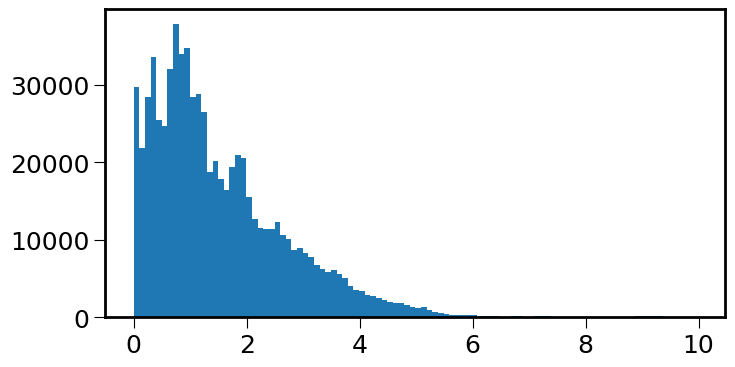

In [13]:
plt.hist(data['lp_zBEST'], bins=100)